___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [4]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [5]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [6]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [8]:
from tensorflow import keras
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print('''
Shape of x_train is {}
Shape of x_test is {}
Shape of y_train is {}
Shape of y_train is {}
'''.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


Shape of x_train is (60000, 28, 28) 
Shape of x_test is (10000, 28, 28) 
Shape of y_train is (60000,) 
Shape of y_train is (10000,) 



In [10]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [12]:
x_train[6].shape

(28, 28)

In [13]:
x_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

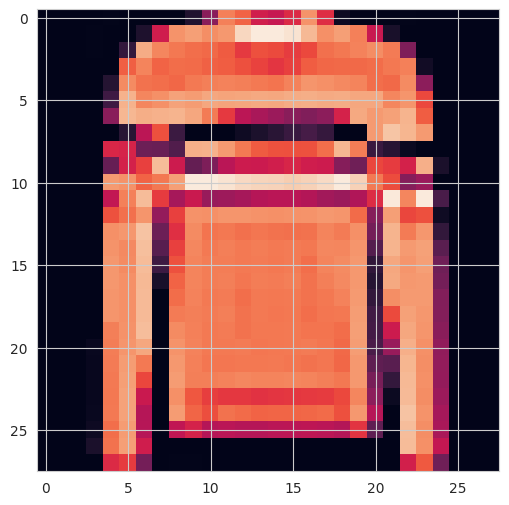

In [15]:
plt.imshow(x_train[5])
plt.show()

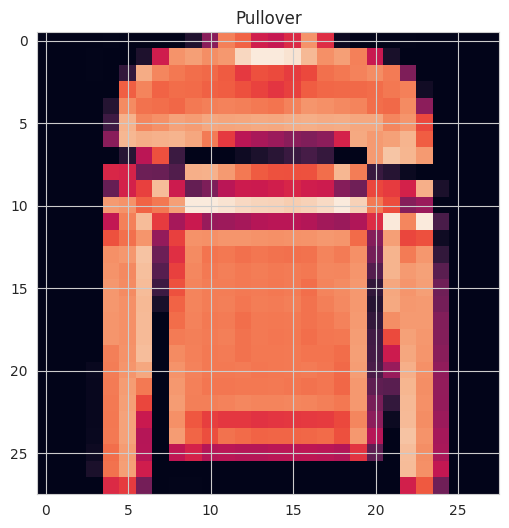

In [16]:
plt.imshow(x_train[5])
plt.title(classes[y_train[5]])
plt.show()

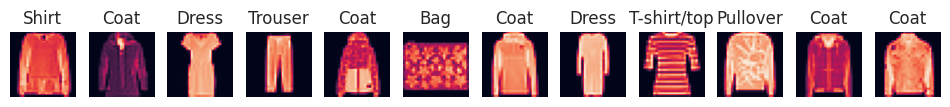

In [18]:
import matplotlib.pyplot as plt

start, end = 18, 30

# Create a subplot grid
fig, axes = plt.subplots(1, end - start, figsize=(12, 2))

for i, ax in enumerate(axes):
    ax.imshow(x_train[i + start])
    ax.set_title(classes[y_train[i + start]])
    ax.axis('off')  # Optional to remove axis labels

plt.show()
#The loop then iterates through the subplots, displaying images and setting titles for each subplot.

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
x_train.min()

0

In [21]:
x_train.max()

255

In [22]:
# Find the maximum value in x_train and x_test arrays
max_value_x_train = x_train.max()
max_value_x_test = x_test.max()

# Normalize x_train and x_test by dividing by the maximum value
x_train = x_train / max_value_x_train
x_test = x_test / max_value_x_test


In [23]:
x_train.min()

0.0

In [24]:
x_train.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:

x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))


In [30]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [34]:
from keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded format
num_classes = 10   # Replace with the actual number of classes in your dataset

y_train= to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [35]:
print(f'''
Shape of x_train is {x_train.shape}
Shape of x_test is {x_test.shape}
Value of y_train at index 13: {y_train[13]}
Value of y_test at index 13: {y_test[13]}
''')



Shape of x_train is (60000, 28, 28, 1)
Shape of x_test is (10000, 28, 28, 1)
Value of y_train at index 13: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Value of y_test at index 13: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]



Validation Data

In [38]:
from numpy.random import seed
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED, shuffle=True)

In [39]:
print("X_train shape -> ", x_train.shape)
print("y_train shape -> ", y_train.shape)
print("X_valid shape -> ", x_valid.shape)
print("y_valid shape -> ", y_valid.shape)

X_train shape ->  (48000, 28, 28, 1)
y_train shape ->  (48000, 10)
X_valid shape ->  (12000, 28, 28, 1)
y_valid shape ->  (12000, 10)


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [44]:
pip install --upgrade tensorflow keras


In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a 2D Convolutional Layer with 28 filters and a 3x3 kernel
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

# Add a Pooling Layer with a 2x2 pool size and 1x1 strides
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Add a Flatten Layer
model.add(Flatten())

# Add a Dense Layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final Dense Layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Display a summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [49]:
from tensorflow.keras.layers import Dropout

# Create a Sequential model
model2 = Sequential()

model2.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Add a second 2D Convolutional Layer with 64 filters and a 3x3 kernel
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a Dropout Layer for regularization
model2.add(Dropout(0.25))


model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        16192     
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               4333696   
                                                      

 added a second 2D Convolutional Layer with 64 filters and a 3x3 kernel.
i added a Dropout Layer after the second Convolutional Layer with a dropout rate of 25%.
i also added another Dropout Layer before the final Dense Layer with a dropout rate of 50%.

In [64]:
model3 = Sequential()

# Convolutional Layer
model3.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())

# Fully Connected Layers
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='relu')) # Added to see the results
model3.add(Dropout(0.3))

# Output Layer
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [65]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                      

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode="max",patience=5 ,restore_best_weights = True)


In [48]:
model.fit(
    x_train,
    y_train,
    batch_size=20,
    epochs=55,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/55
2400/2400 [==============================] - 79s 33ms/step - loss: 0.3910 - accuracy: 0.8622 - val_loss: 0.3078 - val_accuracy: 0.8908
Epoch 2/55
2400/2400 [==============================] - 82s 34ms/step - loss: 0.2621 - accuracy: 0.9051 - val_loss: 0.3574 - val_accuracy: 0.8710
Epoch 3/55
2400/2400 [==============================] - 78s 32ms/step - loss: 0.2205 - accuracy: 0.9203 - val_loss: 0.2745 - val_accuracy: 0.9016
Epoch 4/55
2400/2400 [==============================] - 76s 32ms/step - loss: 0.1921 - accuracy: 0.9323 - val_loss: 0.2872 - val_accuracy: 0.9036
Epoch 5/55
2400/2400 [==============================] - 76s 32ms/step - loss: 0.1708 - accuracy: 0.9389 - val_loss: 0.3083 - val_accuracy: 0.9044
Epoch 6/55
2400/2400 [==============================] - 86s 36ms/step - loss: 0.1544 - accuracy: 0.9457 - val_loss: 0.3326 - val_accuracy: 0.9071
Epoch 7/55
2400/2400 [==============================] - 83s 35ms/step - loss: 0.1398 - accuracy: 0.9520 - val_loss: 0.3349 -

**the fit below is for model2**

In [50]:
# fit the other model wirh dropout
model2.fit(
    x_train,
    y_train,
    batch_size=20,
    epochs=55,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/55
2400/2400 [==============================] - 252s 104ms/step - loss: 0.4945 - accuracy: 0.8300 - val_loss: 0.3211 - val_accuracy: 0.8871
Epoch 2/55
2400/2400 [==============================] - 229s 95ms/step - loss: 0.3494 - accuracy: 0.8811 - val_loss: 0.3336 - val_accuracy: 0.8801
Epoch 3/55
2400/2400 [==============================] - 229s 96ms/step - loss: 0.3320 - accuracy: 0.8889 - val_loss: 0.3634 - val_accuracy: 0.8775
Epoch 4/55
2400/2400 [==============================] - 215s 90ms/step - loss: 0.3219 - accuracy: 0.8929 - val_loss: 0.3231 - val_accuracy: 0.8894
Epoch 5/55
2400/2400 [==============================] - 222s 93ms/step - loss: 0.3217 - accuracy: 0.8948 - val_loss: 0.3133 - val_accuracy: 0.8946
Epoch 6/55
2400/2400 [==============================] - 221s 92ms/step - loss: 0.3176 - accuracy: 0.8965 - val_loss: 0.3160 - val_accuracy: 0.8965
Epoch 7/55
2400/2400 [==============================] - 224s 94ms/step - loss: 0.3140 - accuracy: 0.8999 - val_loss: 

In [66]:
model3.fit(
    x_train,
    y_train,
    batch_size=28,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1715/1715 [==============================] - 32s 18ms/step - loss: 0.5479 - accuracy: 0.8053 - val_loss: 0.3604 - val_accuracy: 0.8768
Epoch 2/30
1715/1715 [==============================] - 39s 23ms/step - loss: 0.3684 - accuracy: 0.8748 - val_loss: 0.3470 - val_accuracy: 0.8759
Epoch 3/30
1715/1715 [==============================] - 31s 18ms/step - loss: 0.3404 - accuracy: 0.8841 - val_loss: 0.3197 - val_accuracy: 0.8885
Epoch 4/30
1715/1715 [==============================] - 44s 26ms/step - loss: 0.3264 - accuracy: 0.8911 - val_loss: 0.3312 - val_accuracy: 0.8876
Epoch 5/30
1715/1715 [==============================] - 31s 18ms/step - loss: 0.3201 - accuracy: 0.8929 - val_loss: 0.3310 - val_accuracy: 0.8937
Epoch 6/30
1715/1715 [==============================] - 30s 17ms/step - loss: 0.3154 - accuracy: 0.8954 - val_loss: 0.3289 - val_accuracy: 0.8936


**TASK 7: Plot values of metrics you used in your model.**

In [51]:
loss= pd.DataFrame(model.history.history)
loss2 = pd.DataFrame(model2.history.history)


In [67]:
loss3=pd.DataFrame(model3.history.history)

In [68]:

print('      Model with  requirements ')
print(loss.head())

print('        Model2 with dropout  ')
print(loss2.head())
print('        Model3 with chang batch_size& epochs ')
print(loss3.head())

      Model with  requirements 
   loss  accuracy  val_loss  val_accuracy
0 0.391     0.862     0.308         0.891
1 0.262     0.905     0.357         0.871
2 0.220     0.920     0.275         0.902
3 0.192     0.932     0.287         0.904
4 0.171     0.939     0.308         0.904
        Model2 with dropout  
   loss  accuracy  val_loss  val_accuracy
0 0.495     0.830     0.321         0.887
1 0.349     0.881     0.334         0.880
2 0.332     0.889     0.363         0.877
3 0.322     0.893     0.323         0.889
4 0.322     0.895     0.313         0.895
        Model3 with chang batch_size& epochs 
   loss  accuracy  val_loss  val_accuracy
0 0.548     0.805     0.360         0.877
1 0.368     0.875     0.347         0.876
2 0.340     0.884     0.320         0.888
3 0.326     0.891     0.331         0.888
4 0.320     0.893     0.331         0.894


**it shows the first model is good **

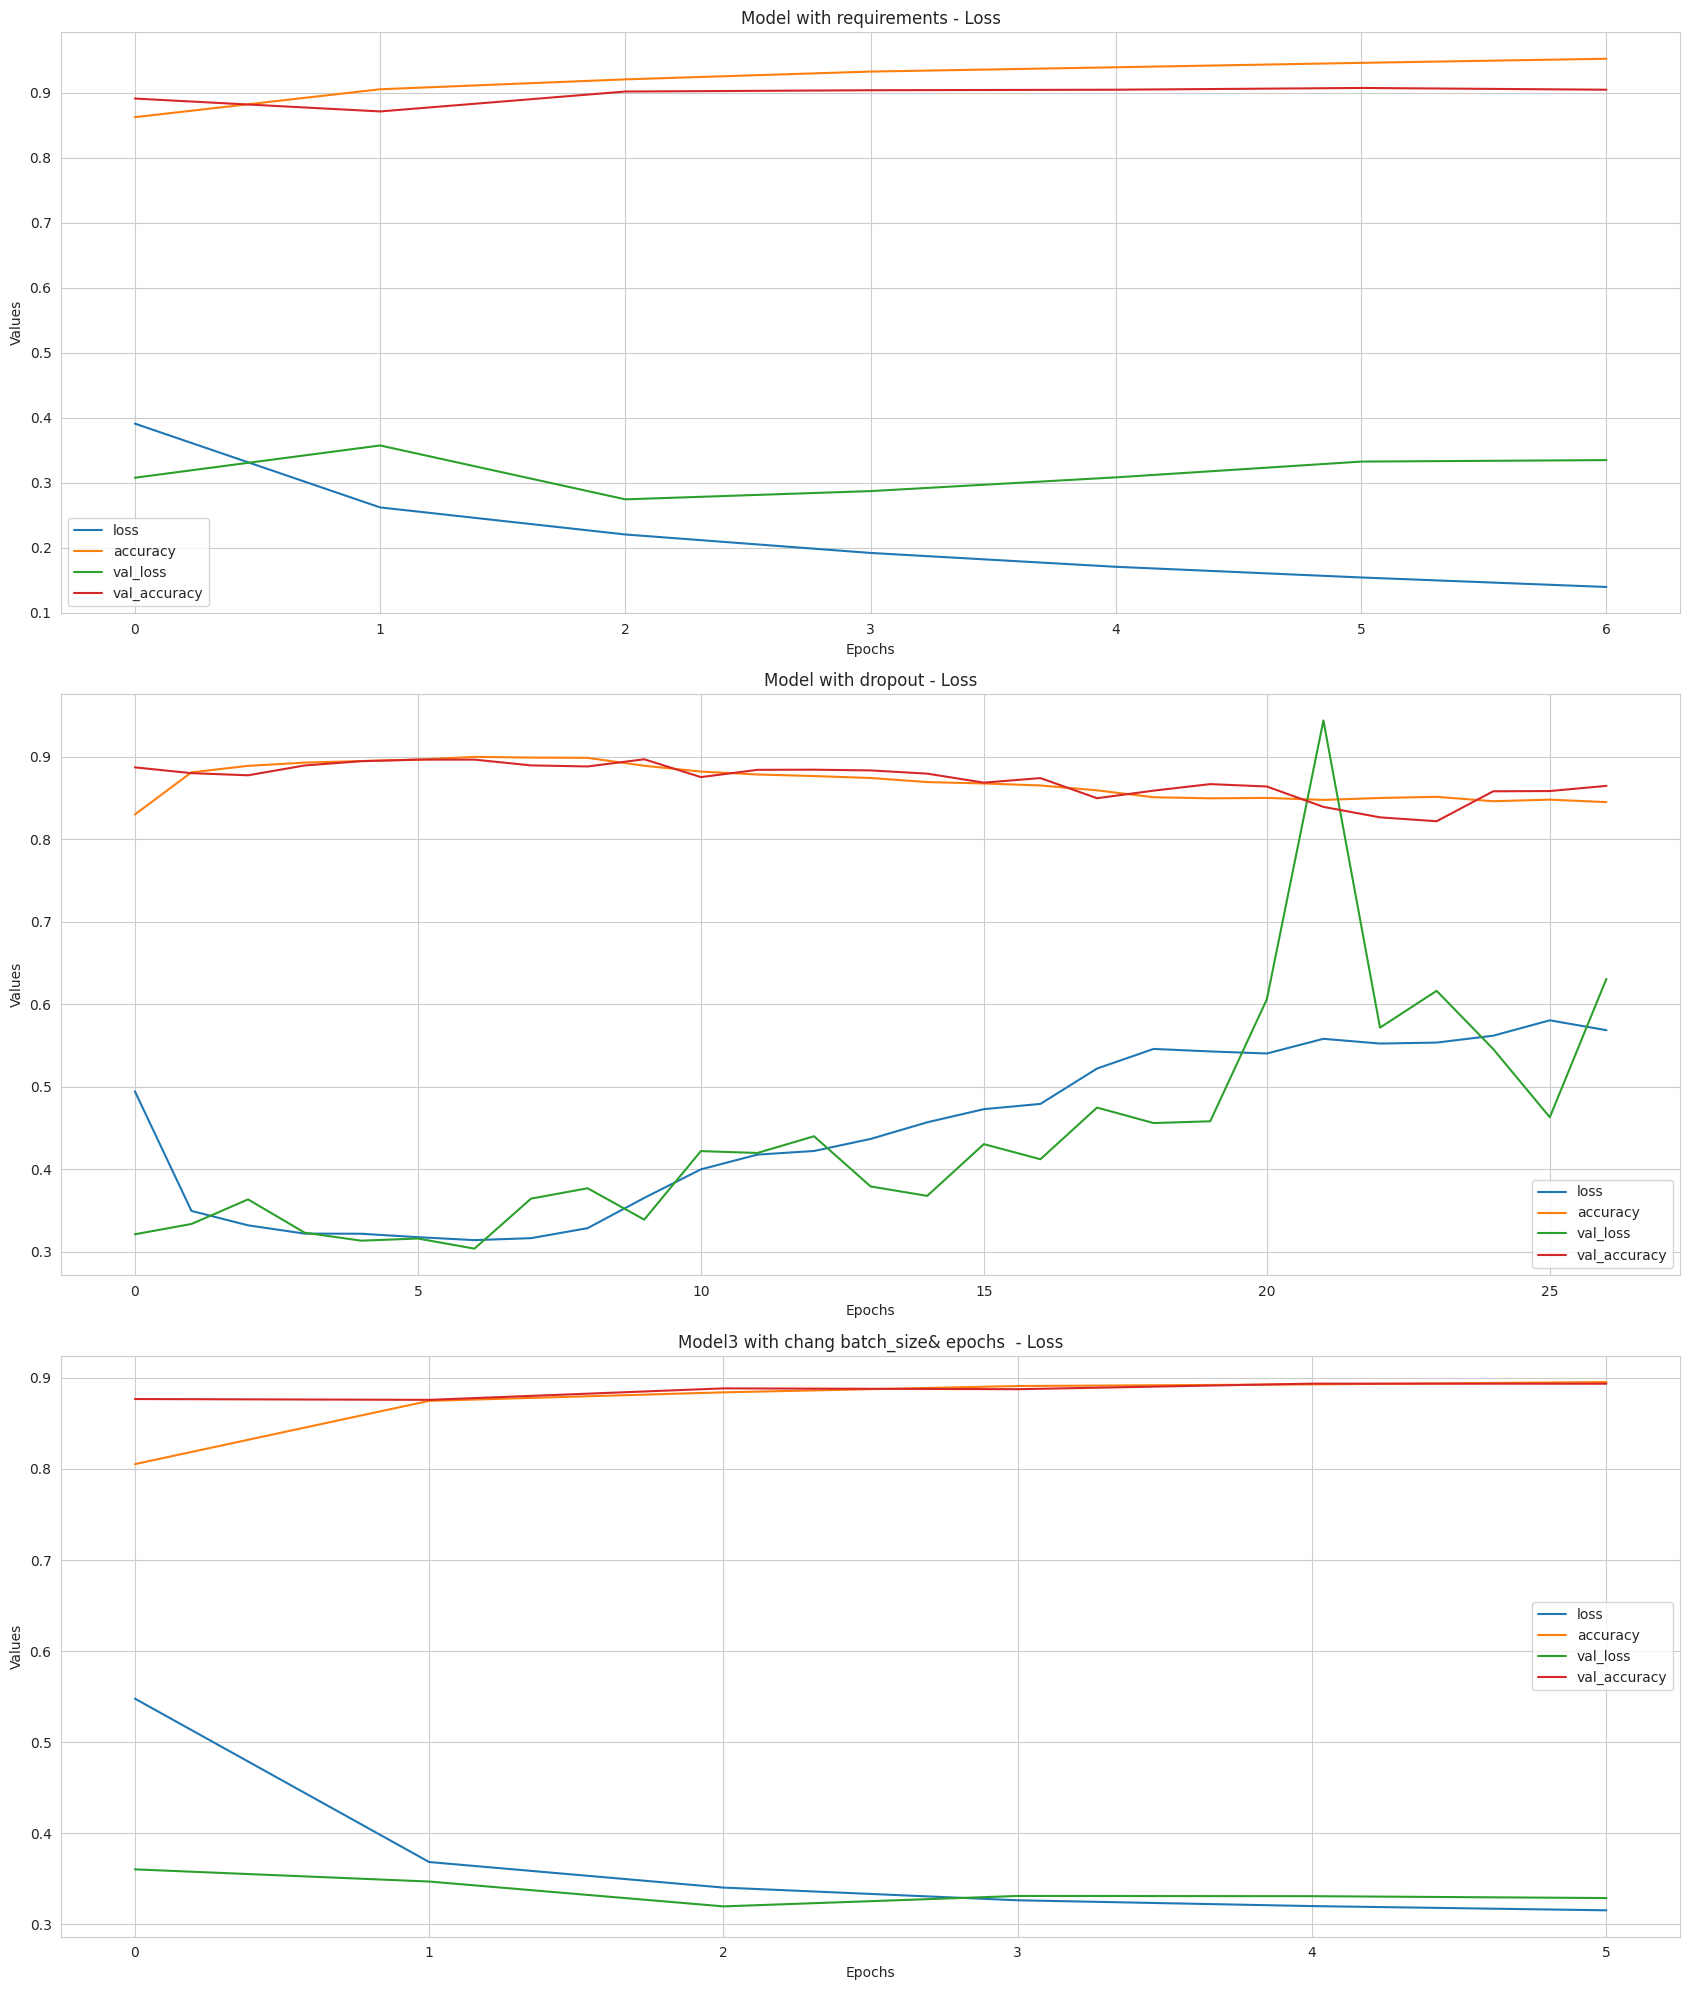

In [69]:
import matplotlib.pyplot as plt


model_data = [
    (loss, 'Model with requirements'),
    (loss2, 'Model with dropout'),
    (loss3,'Model3 with chang batch_size& epochs ')
]
fig, axes = plt.subplots(len(model_data), 1, figsize=(17, 20))
for i, (model_df, model_name) in enumerate(model_data):
    model_df.plot(ax=axes[i])
    axes[i].set_title(f'{model_name} - Loss')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


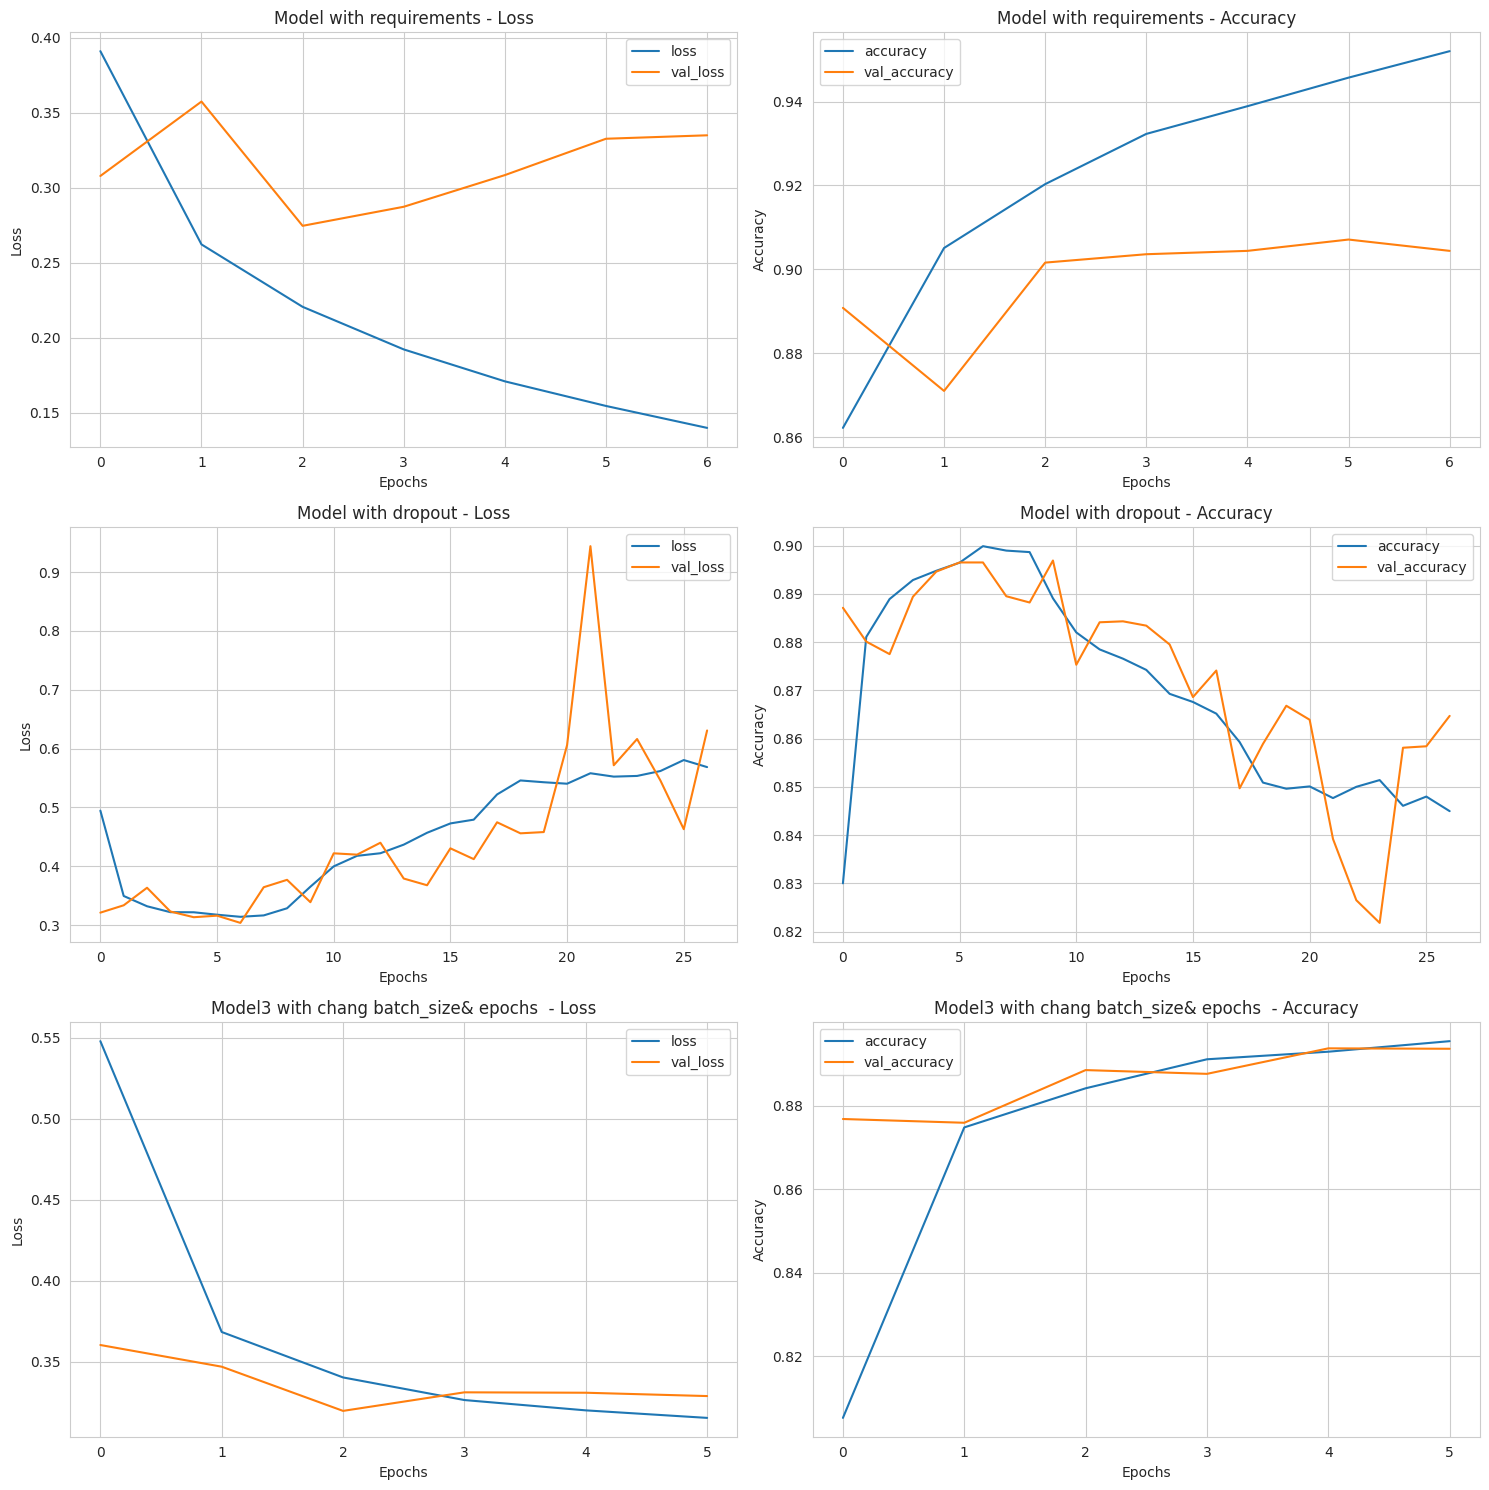

In [70]:

fig, axes = plt.subplots(len(model_data), 2, figsize=(15, 15))
for i, (model_df, model_name) in enumerate(model_data):
    model_df[['loss', 'val_loss']].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'{model_name} - Loss')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')

    # Plot accuracy
    model_df[['accuracy', 'val_accuracy']].plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'{model_name} - Accuracy')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, x_train, y_train, x_test, y_test, classes, dataset='test'):
    if dataset not in ['train', 'test']:
        raise ValueError("Dataset must be 'train' or 'test'.")

    if dataset == 'train':
        x_data = x_train
        y_data = y_train
    else:
        x_data = x_test
        y_data = y_test

    # Get predicted results
    y_pred = model.predict(x_data)
    y_true = y_data

    # Convert numerical predictions and true labels to class labels
    y_pred_labels = [classes[i] for i in np.argmax(y_pred, axis=1)]
    y_true_labels = [classes[i] for i in np.argmax(y_true, axis=1)]

    # Display the classification report
    print(f"{dataset.capitalize()} Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels, target_names=classes))

    # Plot the confusion matrix
    confusion = confusion_matrix(y_true_labels, y_pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{dataset.capitalize()} Confusion Matrix')
    plt.show()

# Example usage:
# evaluate_model(model, x_train, y_train, x_test, y_test, classes, dataset='test')


313/313 [==============================] - 3s 8ms/step
Test Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.94      0.97      0.96      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.75      0.85      0.80      1000
       Dress       0.93      0.87      0.90      1000
        Coat       0.95      0.51      0.66      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.56      0.83      0.67      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.89      0.81      0.85      1000
  Ankle boot       0.98      0.98      0.98      1000

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.87     10000



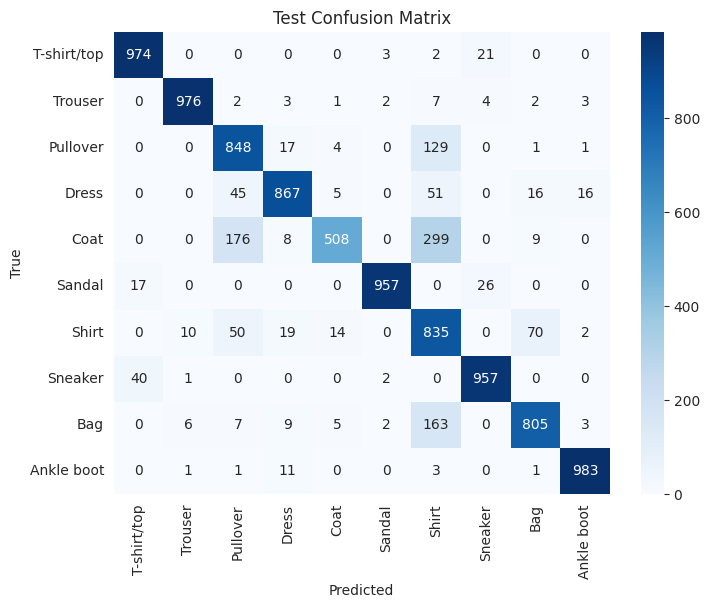

In [60]:

evaluate_model(model, x_train, y_train, x_test, y_test, classes, dataset='test')

1500/1500 [==============================] - 14s 9ms/step
Train Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.99      0.97      4800
     Trouser       0.99      0.99      0.99      4800
    Pullover       0.79      0.88      0.83      4800
       Dress       0.96      0.90      0.93      4800
        Coat       0.97      0.55      0.70      4800
      Sandal       1.00      0.98      0.99      4800
       Shirt       0.61      0.91      0.73      4800
     Sneaker       0.97      0.96      0.97      4800
         Bag       0.92      0.83      0.87      4800
  Ankle boot       0.98      0.99      0.99      4800

    accuracy                           0.90     48000
   macro avg       0.92      0.90      0.90     48000
weighted avg       0.92      0.90      0.90     48000



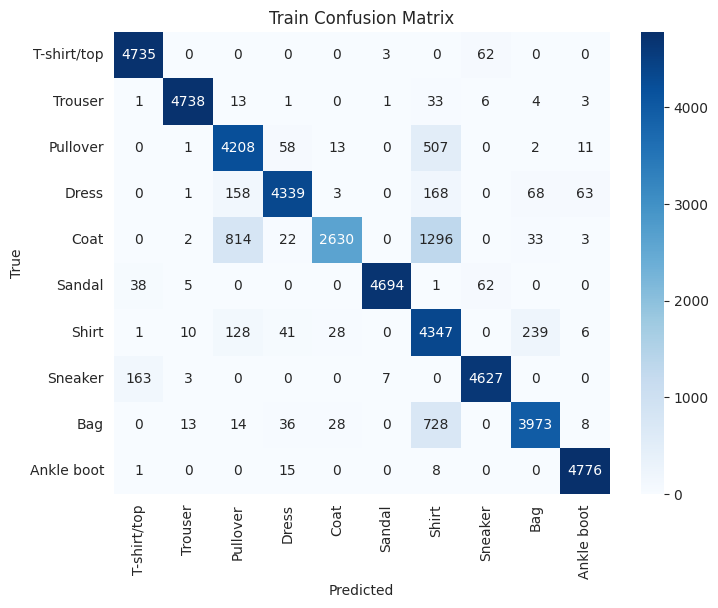

In [62]:

evaluate_model(model, x_train, y_train, x_test, y_test, classes, dataset='train')

**is look the model misclassfication shirt as coat**

313/313 [==============================] - 12s 36ms/step
Test Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.95      0.94      0.95      1000
     Trouser       0.95      0.95      0.95      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.84      0.86      0.85      1000
        Coat       0.76      0.77      0.77      1000
      Sandal       0.98      0.92      0.95      1000
       Shirt       0.57      0.56      0.56      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.74      0.78      0.76      1000
  Ankle boot       1.00      0.91      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



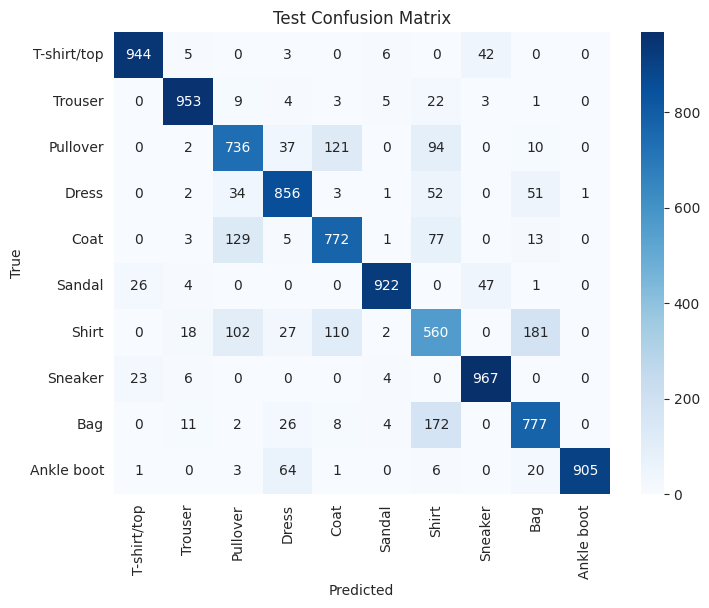

In [61]:

evaluate_model(model2, x_train, y_train, x_test, y_test, classes, dataset='test')

1500/1500 [==============================] - 38s 25ms/step
Train Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.95      0.95      4800
     Trouser       0.96      0.97      0.96      4800
    Pullover       0.77      0.78      0.77      4800
       Dress       0.85      0.88      0.87      4800
        Coat       0.80      0.81      0.80      4800
      Sandal       0.98      0.94      0.96      4800
       Shirt       0.66      0.63      0.64      4800
     Sneaker       0.92      0.96      0.94      4800
         Bag       0.77      0.83      0.80      4800
  Ankle boot       1.00      0.91      0.95      4800

    accuracy                           0.86     48000
   macro avg       0.87      0.86      0.86     48000
weighted avg       0.87      0.86      0.86     48000



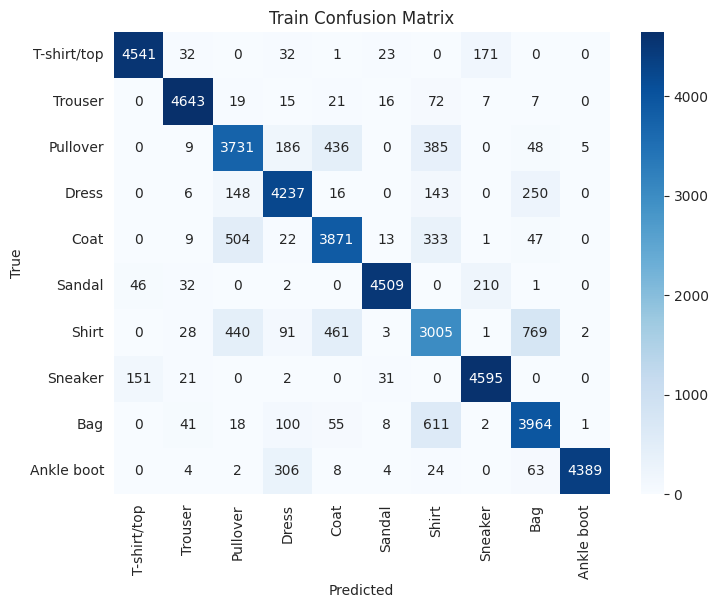

In [63]:

evaluate_model(model2, x_train, y_train, x_test, y_test, classes, dataset='train')

# **evaluate_model3**

313/313 [==============================] - 2s 7ms/step
Test Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.95      0.94      0.95      1000
     Trouser       0.94      0.98      0.96      1000
    Pullover       0.78      0.82      0.80      1000
       Dress       0.82      0.93      0.87      1000
        Coat       0.84      0.79      0.81      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.69      0.65      0.67      1000
     Sneaker       0.91      0.96      0.93      1000
         Bag       0.87      0.80      0.83      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



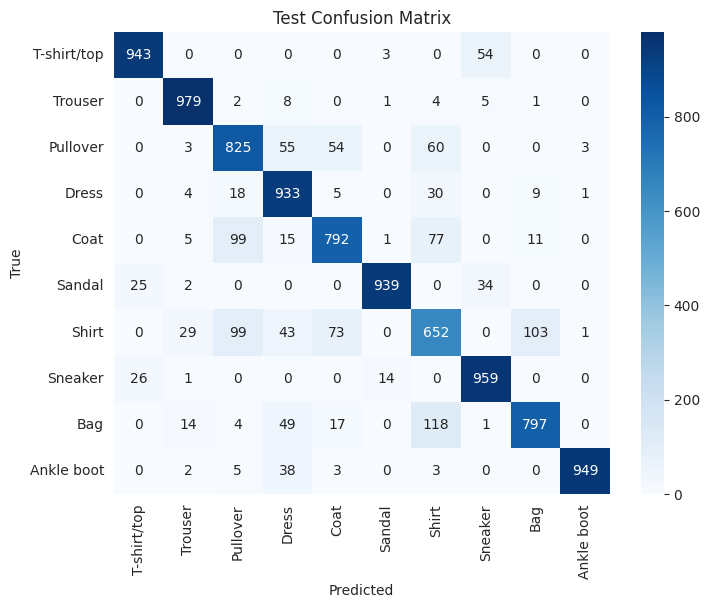

In [71]:

evaluate_model(model3, x_train, y_train, x_test, y_test, classes, dataset='test')

1500/1500 [==============================] - 9s 6ms/step
Train Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.95      0.96      4800
     Trouser       0.95      0.98      0.96      4800
    Pullover       0.80      0.85      0.82      4800
       Dress       0.83      0.93      0.88      4800
        Coat       0.85      0.81      0.83      4800
      Sandal       0.98      0.95      0.97      4800
       Shirt       0.72      0.68      0.70      4800
     Sneaker       0.92      0.97      0.95      4800
         Bag       0.87      0.81      0.84      4800
  Ankle boot       0.99      0.96      0.98      4800

    accuracy                           0.89     48000
   macro avg       0.89      0.89      0.89     48000
weighted avg       0.89      0.89      0.89     48000



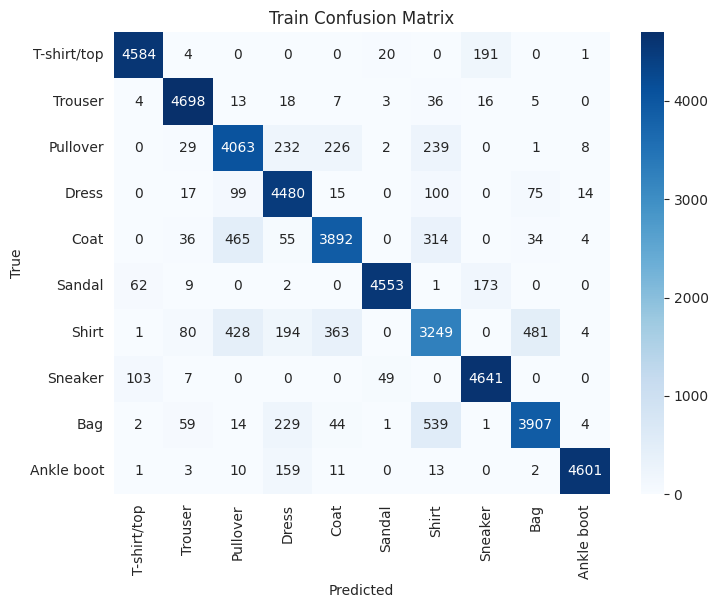

In [72]:

evaluate_model(model3, x_train, y_train, x_test, y_test, classes, dataset='train')

is vary good

## Prediction

In [73]:
def plot_sample_with_prediction(model1, x_test, y_test, classes, sample_index):
    sample = x_test[sample_index]
    sample = np.expand_dims(sample, 0)
    pred_prob = model.predict(sample)
    y_pred = np.argmax(pred_prob)
    y_true = np.argmax(y_test[sample_index])

    # Plot the sample image
    plt.figure(figsize=(4, 4))
    plt.imshow(sample[0])
    plt.title(f'Actual: {classes[y_true]}\nPredicted: {classes[y_pred]}')
    plt.axis('off')
    plt.show()



predction for first model

1/1 [==============================] - 0s 40ms/step


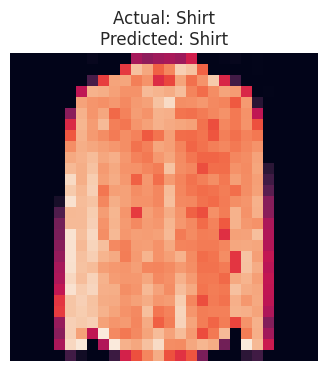

In [76]:
plot_sample_with_prediction(model, x_test, y_test, classes, 44)

predction for model2

1/1 [==============================] - 0s 88ms/step


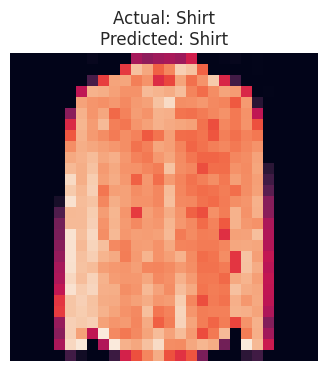

In [77]:
plot_sample_with_prediction(model2, x_test, y_test, classes, 44)

predction for model3

1/1 [==============================] - 0s 43ms/step


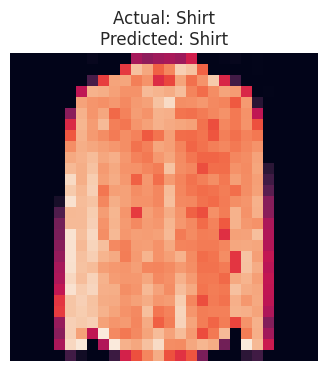

In [78]:
plot_sample_with_prediction(model3, x_test, y_test, classes, 44)


# All three models are correct, but the highest accuracy is achieved by Model 3.

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___